#TASK 4

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [ ]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)
df

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [ ]:
df.describe()


,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [ ]:
df.shape
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

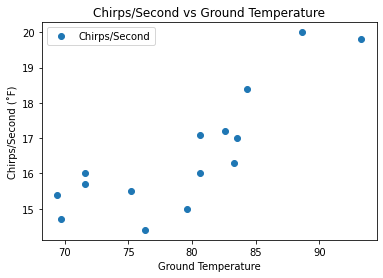

In [ ]:
df.plot(y='Chirps/Second', x='Ground Temperature', style='o')
plt.title('Chirps/Second vs Ground Temperature')
plt.ylabel('Chirps/Second (˚F)')
plt.xlabel('Ground Temperature')
plt.show()

In [ ]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


In [ ]:
X = df.loc[:, ['Ground Temperature']].values
y = df.loc[:, 'Chirps/Second'].values 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
y_test # test data of chrips/second

array([14.4, 17.2, 17.1, 19.8, 16. ])

In [ ]:
X_test # test data of groound temperature

array([[76.3],
       [82.6],
       [80.6],
       [93.3],
       [71.6]])

In [ ]:
X_train.shape, y_train.shape

((10, 1), (10,))

In [ ]:
from sklearn.linear_model import LinearRegression # import 
regressor = LinearRegression()   # initialize
regressor.fit(X_train, y_train) #fit 

LinearRegression()

In [ ]:
print('The intercept value is :',regressor.intercept_) # best value of c
print('The co-efficient value is :',regressor.coef_) 

The intercept value is : -60.75438477342746
The co-efficient value is : [0.9055559]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([15.95316033, 17.1878489 , 16.79588427, 19.28485966, 15.03204345])

In [ ]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt

,Actual,Predicted
0,14.4,15.953160
1,17.2,17.187849
2,17.1,16.795884
3,19.8,19.284860
4,16.0,15.032043


In [ ]:
regressor.score(X_test,y_test)   # R2 using .score method
print('R2- SCORE:',regressor.score(X_test,y_test))

R2- SCORE: 0.8584004514489896


The R2 value is below 0.8, this is not a good fit for this data.

In [ ]:
temp=float(input())
regressor.predict([[temp]])  # Extrapolation

95


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([25.27342612])

In [ ]:
def chirps_to_temp(y):
    ret = (y - regressor.intercept_) / regressor.coef_[0]
    print('With an observation of {} chirps/sec, '
          'we expect a ground temp of {:.2f}˚F'.format(y, ret))

In [ ]:
y=float(input())
chirps_to_temp(y)

18
With an observation of 18.0 chirps/sec, we expect a ground temp of 86.74˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [ ]:
dff = pd.read_fwf("brain_body.txt")
dff

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [ ]:
dff.describe()

,Brain,Body
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


In [ ]:
dff.shape
dff.dtypes

Brain    float64
Body     float64
dtype: object

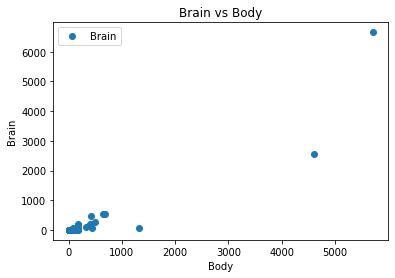

In [ ]:
dff.plot(x='Body', y='Brain', style='o')
plt.title('Brain vs Body')
plt.xlabel('Body')
plt.ylabel('Brain')
plt.show()

In [ ]:
dff.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [ ]:
X = dff[['Body']]
y = dff['Brain'] 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
X_train.shape, y_train.shape

((43, 1), (43,))

In [ ]:
from sklearn.linear_model import LinearRegression # import 
regressor = LinearRegression()   # initialize
regressor.fit(X_train, y_train) #fit 

LinearRegression()

In [ ]:
print('The intercept value is :',regressor.intercept_) # best value of c
print('The co-efficient value is :',regressor.coef_) 

The intercept value is : -60.75438477342746
The co-efficient value is : [0.9055559]


In [ ]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([-25.25659333, -55.7738273 ,  43.38454421, -50.97438101,
       555.02363007, 318.67353908,  81.41789218, 322.2957627 ,
       306.90131233, -60.5279958 , -58.49049501, -54.77771581,
       -54.95882699, 101.34012208, -57.58493911, -58.39993942,
        43.38454421,  97.71789846, 532.38473247])

In [ ]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dt

,Actual,Predicted
50,4.288,-25.256593
7,1.040,-55.773827
5,27.660,43.384544
15,3.500,-50.974381
27,529.000,555.023630
20,187.100,318.673539
44,100.000,81.417892
3,465.000,322.295763
28,207.000,306.901312
39,0.010,-60.527996


In [ ]:
regressor.score(X_test,y_test)   # R2 using .score method
print('R2- SCORE:',regressor.score(X_test,y_test))

R2- SCORE: 0.8584004514489896


# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [12]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [13]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [14]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [15]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [10]:
dataset = df.drop_duplicates()

In [16]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [17]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

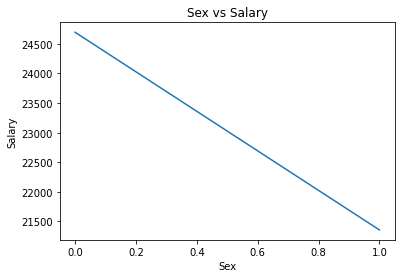

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [30]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()
df[['Sex','Salary']].corr()

There is a linear relationship between Sex and Salary

Negative correlation 


---



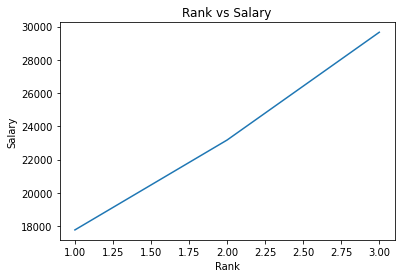

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [31]:
df.groupby('Rank')['Salary'].mean().plot()
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()
df[['Rank','Salary']].corr()

There is a linear relationship between Sex and Salary

positive correlation 

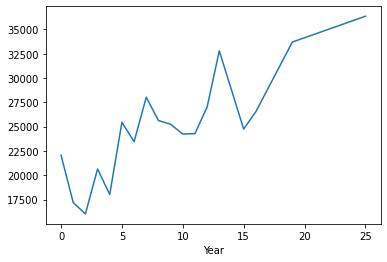

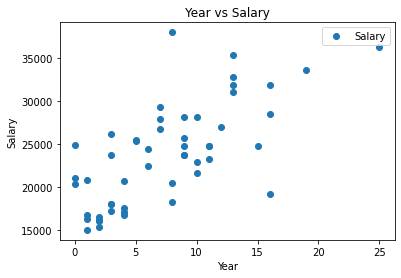

,Year,Salary
Year,1.000000,0.700669
Salary,0.700669,1.000000


In [33]:
df.groupby('Year')['Salary'].mean().plot()
df.plot(x='Year', y='Salary', style='o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()
df[['Year','Salary']].corr()

There is a linear relationship between year and salary 

High correlation between the data 

No transformation reqd

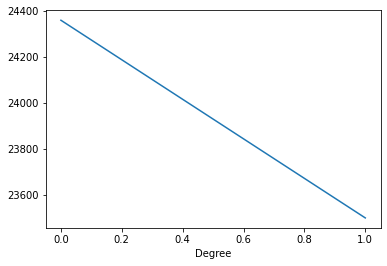

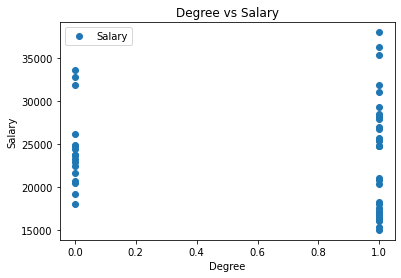

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [34]:
df.groupby('Degree')['Salary'].mean().plot()
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()
df[['Degree','Salary']].corr()

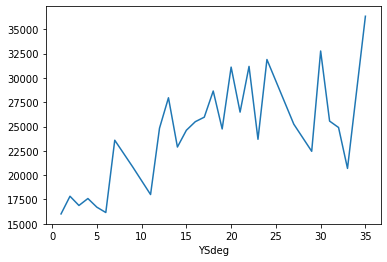

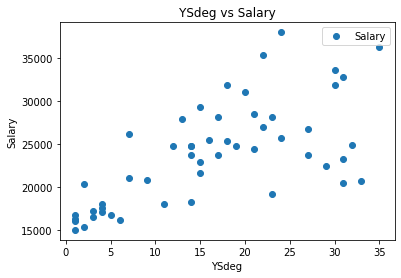

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [35]:
df.groupby('YSdeg')['Salary'].mean().plot()
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()
df[['YSdeg','Salary']].corr()

There is a linear relationship between year and salary 

High correlation between the data 

No transformation reqd

In [54]:
X = df[['Sex', 'Rank',	'Year', 'Degree', 'YSdeg']] #array of features
y = df['Salary'] #array of targets

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank',	'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test)
coeff_df

,Coefficient
Sex,1136.454923
Rank,5702.750104
Year,440.449689
Degree,-915.556255
YSdeg,-121.650970


In [58]:
regressor.predict([[0,3,50,3,35]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([43235.41920026])

In [59]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,36350,34055.289482
41,18000,16795.075642
34,22450,22765.912281
24,24832,24103.316656
14,25748,28346.255124
2,28200,28908.355782
22,27959,28803.516413
9,32850,30172.053347
8,31850,30293.704317
48,16244,16215.129706


In [60]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.9097918670796886


In [66]:
num_by_sex = df.Sex.value_counts()
print('Num men: {}\nNum women: {}'.format(num_by_sex[0], num_by_sex[1]))

Num men: 38
Num women: 14


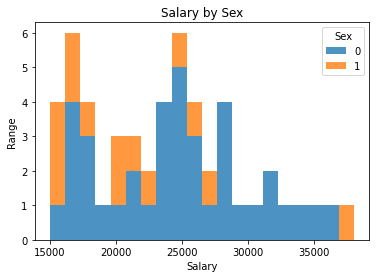

In [74]:
df.pivot_table(index=df.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.8, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Salary')
plt.ylabel('Range')
plt.show()

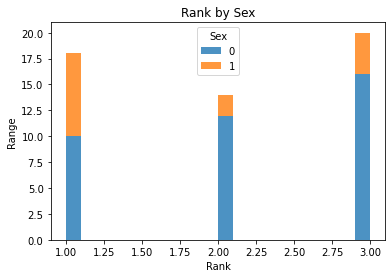

In [75]:
df.pivot_table(index=df.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.8, stacked=True, bins=20, title='Rank by Sex')
plt.xlabel('Rank')
plt.ylabel('Range')
plt.show()

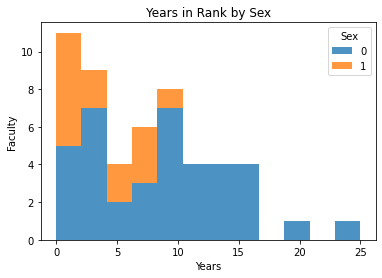

In [73]:
df.pivot_table(index=df.index, columns='Sex', values='Year') \
    .plot(kind='hist', alpha=0.8, stacked=True, bins=12,
          title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Range')
plt.show()

In [76]:
df_sd= df[df['Year'] <= 10]

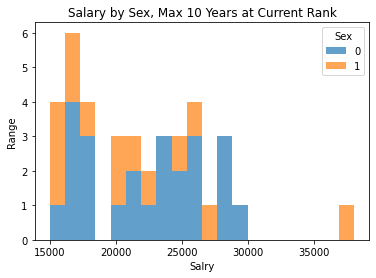

In [77]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Salary') \
    .plot(kind='hist', alpha=0.7, stacked=True, bins=20,
          title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Salry')
plt.ylabel('Range')
plt.show()

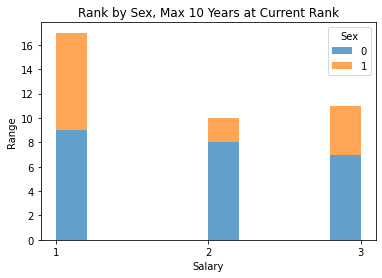

In [78]:
df_sd.pivot_table(index=df_sd.index, columns='Sex', values='Rank') \
    .plot(kind='hist', alpha=0.7, stacked=True, 
          title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Salary')
plt.ylabel('Range')
plt.show()